# Sprint 18 - Dataset Creation

## Problem 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

path = 'own_dataset'
flist = os.listdir(path)

In [ ]:
flist

['cat_5.jpeg',
 'cat_4.jpeg',
 'cat_3.jpeg',
 'cat_2.jpeg',
 'cat_1.jpeg',
 'dog_4.jpeg',
 'dog_3.jpeg',
 'dog_2.jpeg',
 'dog_1.jpeg',
 'dog_5.jpeg']

In [ ]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [ ]:
img_list

['own_dataset/cat_5.jpeg',
 'own_dataset/cat_4.jpeg',
 'own_dataset/cat_3.jpeg',
 'own_dataset/cat_2.jpeg',
 'own_dataset/cat_1.jpeg',
 'own_dataset/dog_4.jpeg',
 'own_dataset/dog_3.jpeg',
 'own_dataset/dog_2.jpeg',
 'own_dataset/dog_1.jpeg',
 'own_dataset/dog_5.jpeg']

(224, 224, 3)


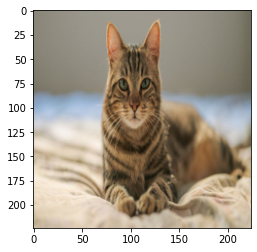

In [ ]:
cat_img = Image.open(img_list[1])
cat_img = cat_img.resize((224, 224))
cat_img = np.array(cat_img)
print(cat_img.shape)
plt.imshow(cat_img)

<class 'numpy.ndarray'>


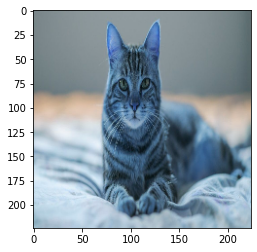

In [ ]:
img = cv2.imread(img_list[1])
img = cv2.resize(img, (224, 224))
print(type(img))
plt.imshow(img)

In [ ]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    if re.search('dog', img):       
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    if re.search('cat', img):
        cat_img_ = Image.open(img)      
        cat_img_ = cat_img_.resize((224, 224))    
        cat_img = np.array(cat_img_)  
        cat_img = cat_img / 255. 
        cat_img = cat_img.reshape((1,224,224,3)) 
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [ ]:
print(cat_img_array)

[[[[0.24705882 0.25490196 0.23529412]
   [0.25098039 0.25882353 0.23921569]
   [0.25098039 0.25882353 0.23921569]
   ...
   [0.66666667 0.70588235 0.6745098 ]
   [0.6745098  0.71372549 0.68235294]
   [0.67058824 0.70980392 0.67843137]]

  [[0.24705882 0.25490196 0.23529412]
   [0.25098039 0.25882353 0.23921569]
   [0.25490196 0.2627451  0.24313725]
   ...
   [0.66666667 0.70588235 0.6745098 ]
   [0.6745098  0.71372549 0.68235294]
   [0.6745098  0.71372549 0.68235294]]

  [[0.25098039 0.25882353 0.23921569]
   [0.25098039 0.25882353 0.23921569]
   [0.25490196 0.2627451  0.24313725]
   ...
   [0.66666667 0.70196078 0.6745098 ]
   [0.67058824 0.70980392 0.67843137]
   [0.6745098  0.71372549 0.68235294]]

  ...

  [[0.82352941 0.76862745 0.73333333]
   [0.82352941 0.76862745 0.73333333]
   [0.81960784 0.76470588 0.72941176]
   ...
   [0.74901961 0.70196078 0.61176471]
   [0.74901961 0.70196078 0.60784314]
   [0.74509804 0.69803922 0.60392157]]

  [[0.76862745 0.71372549 0.67843137]
   [0.7

In [ ]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

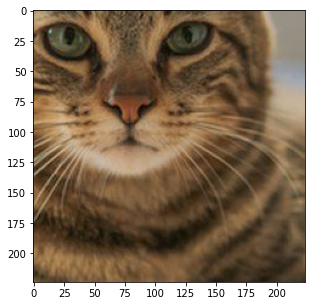

In [ ]:
img = Image.open(img_list[1])
img_new = crop_center(img, 224, 224)
plt.imshow(img_new)

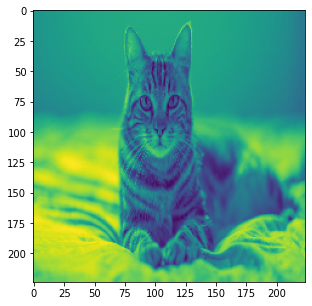

In [ ]:
img = cv2.imread(img_list[1], 0)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

- Let's now solve the classification problem

In [ ]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:

    if re.search('dog', img):      
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))  
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
img_array.shape

(10, 224, 224, 3)

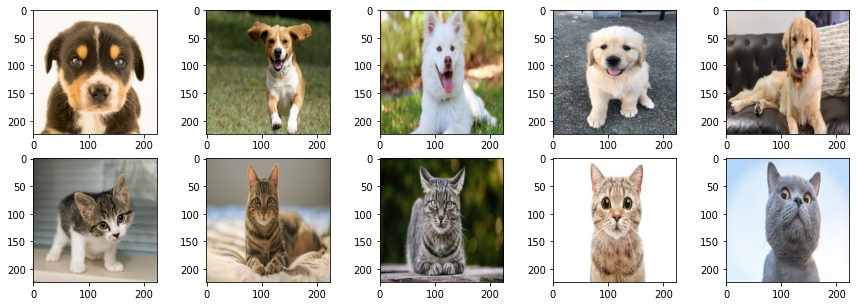

In [ ]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array[i])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
d_img_array = np.empty((0,224,224,3))

for img in img_list:

    d_img = Image.open(img)
    d_img = d_img.resize((224, 224))
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1,224,224,3))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(10, 224, 224, 3)


In [ ]:
Y = []
for i in  img_list:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [ ]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,  activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
opt = optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(X, Y, nb_epoch=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/20
10/10 [==============================] - 1s 114ms/step - loss: 0.6875 - accuracy: 0.4000
Epoch 2/20
10/10 [==============================] - 1s 51ms/step - loss: 6.9322 - accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 0s 46ms/step - loss: 11.0613 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 44ms/step - loss: 7.2047 - accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 46ms/step - loss: 1.2503 - accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 0s 44ms/step - loss: 4.9640 - accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 0s 45ms/step - loss: 6.5078 - accuracy: 0.5000
Epoch 8/20
10/10 [==============================] - 0s 46ms/step - loss: 2.0786 - accuracy: 0.8000
Epoch 9/20
10/10 [==============================] - 0s 46ms/step - loss: 1.8944 - accuracy: 0.6000
Epoch 10/20
10/10 [==============================] - 0s 46ms/step - loss: 1.1977 - accuracy: 0.7000
Epoch 1

In [ ]:
path2 = "test"
img_list2 = glob.glob(path2 + '/*' + ".jpeg")
t_img_array = np.empty((0,224,224,3))

for img in img_list2:

    t_img = Image.open(img)
    t_img = t_img.resize((224, 224))
    t_img = np.array(t_img)
    t_img = t_img / 255.0
    t_img = t_img.reshape((1,224,224,3))
    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)

print(t_img_array.shape)
X_test = t_img_array

(10, 224, 224, 3)


In [ ]:
Y_test = []
for i in  img_list2:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [ ]:
Y_pred = np.round(model.predict(X_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[4, 1],
       [3, 2]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6

## Problem 2

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

input_dir = "own_dataset/dog"
files = glob.glob(input_dir + '/*.jpeg')
 
output_dir = "results"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [ ]:
input_dir = "own_dataset/cat"
files = glob.glob(input_dir + '/*.jpeg')

output_dir = "results"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
    
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [ ]:
path3 = "results"
img_list_mix = glob.glob(path3 + '/*' + ".jpg")

In [ ]:
d_img_array = np.empty((0,224,224,3))
for img in img_list_mix:
    d_img = Image.open(img)
    d_img = d_img.resize((224, 224))
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1,224,224,3))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)
print(d_img_array.shape)
X = d_img_array

(632, 224, 224, 3)


In [ ]:
Y = []
for i in  img_list_mix:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)

In [ ]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(200,  activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
opt = optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(X, Y, nb_epoch=15,  batch_size=50, validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 568 samples, validate on 64 samples
Epoch 1/15
568/568 [==============================] - 15s 27ms/step - loss: 0.7357 - accuracy: 0.5335 - val_loss: 0.6363 - val_accuracy: 0.8750
Epoch 2/15
568/568 [==============================] - 15s 26ms/step - loss: 0.6144 - accuracy: 0.6620 - val_loss: 0.3890 - val_accuracy: 0.9375
Epoch 3/15
568/568 [==============================] - 15s 26ms/step - loss: 0.4742 - accuracy: 0.7940 - val_loss: 0.4634 - val_accuracy: 0.7344
Epoch 4/15
568/568 [==============================] - 15s 27ms/step - loss: 0.2467 - accuracy: 0.9085 - val_loss: 0.2503 - val_accuracy: 0.9219
Epoch 5/15
568/568 [==============================] - 15s 27ms/step - loss: 0.1055 - accuracy: 0.9613 - val_loss: 0.1284 - val_accuracy: 0.9688
Epoch 6/15
568/568 [==============================] - 15s 27ms/step - loss: 0.0387 - accuracy: 0.9859 - val_loss: 0.6402 - val_accuracy: 0.7969
Epoch 7/15
568/568 [==============================] - 15s 27ms/step - loss: 0.0180 - accura

## Problem 3

In [ ]:
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [ ]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

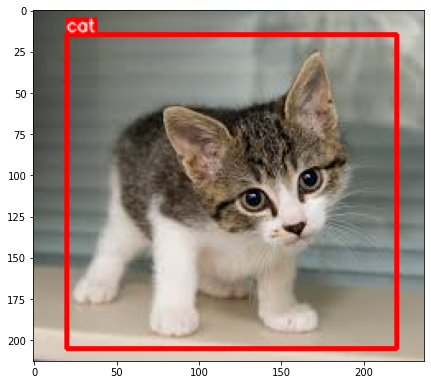

In [ ]:
from PIL import Image
image = download_image('own_dataset/cat_5.jpeg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,15,200,190]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

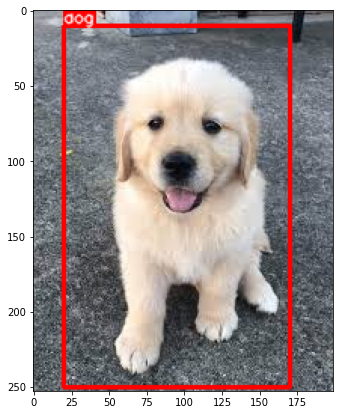

In [ ]:
from PIL import Image
image = download_image('own_dataset/dog_1.jpeg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,10,150,240]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

## Problem 4

In [ ]:
from urllib.request import urlopen
import cv2
import albumentations as A
from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
                           )

In [ ]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, bbox_params=A.BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

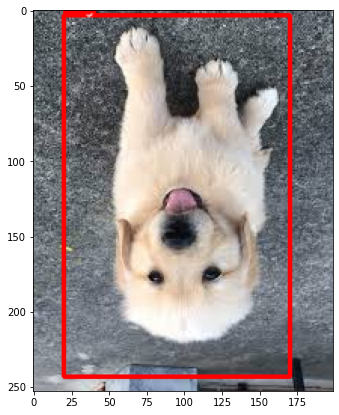

In [ ]:
aug = get_aug([A.VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

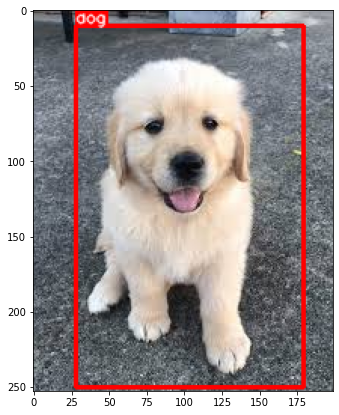

In [ ]:
aug = get_aug([HorizontalFlip(p=0.5)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)